KNN Regressor:
1. Import data set
2. Seperate x(Gender, Height) and y (y=Weight)
3. Train = 70%, Test = 30%
4. Apply Linear Regression
5. Evaluate Model (Accuracy, MSE, MAE)
6. Apply KNN Regressor: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
7. Evaluate Model (Accuracy, MSE, Prediction)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('weight-height.csv')

In [3]:
df.head(10)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
7,Male,68.348516,167.971111
8,Male,67.018950,175.929440
9,Male,63.456494,156.399676


In [4]:
df.describe()

,Height,Weight
count,8555.000000,8555.000000
mean,66.809925,165.632735
std,3.851454,32.043922
min,54.616858,65.780000
25%,63.957684,139.876803
50%,66.985923,168.521567
75%,69.604427,190.666305
max,80.450000,269.989698


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  8555 non-null   object 
 1   Height  8555 non-null   float64
 2   Weight  8555 non-null   float64
dtypes: float64(2), object(1)
memory usage: 200.6+ KB


In [6]:
df.shape

(8555, 3)

In [7]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [8]:
df.corr()

,Height,Weight
Height,1.000000,0.922975
Weight,0.922975,1.000000


### Scaling with Normalization

In [9]:
df1 = df.copy()

In [10]:
from sklearn.preprocessing import MinMaxScaler 
norm_scaler = MinMaxScaler()

In [11]:
df1.columns

Index(['Gender', 'Height', 'Weight'], dtype='object')

### Fit and Transform

In [12]:
height = norm_scaler.fit(df1[['Height']])

In [13]:
height

MinMaxScaler()

In [14]:
df1.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [15]:
df1['Height'] = norm_scaler.transform(df1[['Height']])

In [16]:
df1.head()

,Gender,Height,Weight
0,Male,0.744399,241.893563
1,Male,0.548328,162.310473
2,Male,0.754583,212.740856
3,Male,0.662487,220.042470
4,Male,0.590905,206.349801


### Label Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
label_encoder = LabelEncoder()
label_encoder

LabelEncoder()

In [19]:
df1.head()

,Gender,Height,Weight
0,Male,0.744399,241.893563
1,Male,0.548328,162.310473
2,Male,0.754583,212.740856
3,Male,0.662487,220.042470
4,Male,0.590905,206.349801


In [20]:
df1.Gender = label_encoder.fit_transform(df1.Gender)

In [21]:
df1.head()

,Gender,Height,Weight
0,1,0.744399,241.893563
1,1,0.548328,162.310473
2,1,0.754583,212.740856
3,1,0.662487,220.042470
4,1,0.590905,206.349801


#### Seperate x(Gender, Height) and y (y=Weight)

In [22]:
x = df1.drop('Weight', axis='columns')
x

,Gender,Height
0,1,0.744399
1,1,0.548328
2,1,0.754583
3,1,0.662487
4,1,0.590905
...,...,...
8550,0,0.227115
8551,0,0.340900
8552,0,0.424540
8553,0,0.495995


In [23]:
y = df1['Weight']
y

0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
8550    110.565497
8551    129.921671
8552    155.942671
8553    151.678405
8554    131.253738
Name: Weight, Length: 8555, dtype: float64

#### Split the dataset into  Training and testing

In [24]:
x_train, x_test, y_train, y_test = tts(x,y,test_size=.30,random_state=23)

In [25]:
x_train.head()

,Gender,Height
4478,1,0.423845
7317,0,0.438577
712,1,0.603750
7690,0,0.438312
477,1,0.497147


In [26]:
x_train.shape

(5988, 2)

In [27]:
x_test.shape

(2567, 2)

### Applying Linear Regression

In [28]:
lin_reg = LinearRegression()
lin_reg

LinearRegression()

In [29]:
lin_reg.fit(x_train, y_train) #training

LinearRegression()

In [30]:
lin_pred = lin_reg.predict(x_test)
lin_pred

array([115.75159375, 120.81605161, 198.24315645, ..., 151.22122947,
       187.48938935, 141.87610393])

In [31]:
lin_reg.predict([[0,.74]])

array([195.78230154])

In [32]:
lin_reg.predict([[1,.74]])

array([215.21189538])

#### Evaluate Model (Accuracy, MSE, MAE)

In [33]:
accuracy = r2_score(y_test, lin_pred)
accuracy

0.8948968858708215

In [34]:
mse = mean_squared_error(y_test, lin_pred)
mse

106.33493434941671

In [35]:
mae = mean_absolute_error(y_test, lin_pred)
mae

8.059548582120026

### Applying KNN Regressor:

In [36]:
from sklearn.neighbors import KNeighborsRegressor

In [37]:
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(x_train, y_train)

KNeighborsRegressor()

In [38]:
knn_pred = neigh.predict(x_test)
knn_pred

array([113.04417562, 111.0063328 , 197.97238004, ..., 149.11994142,
       185.0310776 , 140.98552804])

In [39]:
neigh.predict([[0,.74]])

array([179.499995])

In [40]:
neigh.predict([[1,.74]])

array([206.76120546])

#### Evaluate Model (Accuracy, MSE, MAE)

In [41]:
accuracy = r2_score(y_test, knn_pred)
accuracy

0.8744599209389662

In [42]:
mse = mean_squared_error(y_test, knn_pred)
mse

127.01142278970406

In [43]:
mae = mean_absolute_error(y_test, knn_pred)
mae

8.861680432573433

Step 02:
KNN Classifier:
1. Import data set
2. Seperate x and y (y=diagnosis)
3. Train = 70%, Test = 30%
4. Apply KNN Classifier 
5. Evaluate Model (Accuracy, Confusion Matrix, ROC, AUC, Classification Report)
6. Apply KNN Classifier: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
7. Compare the model with decision tree classifier

In [44]:
df2 = pd.read_csv('Breast Cancer.csv')

In [45]:
df2.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [46]:
df2.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [47]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [48]:
df2.shape

(569, 33)

In [49]:
df2.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [50]:
df2.corr()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,NaN
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,NaN
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,NaN
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,NaN
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,NaN
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,NaN
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,NaN


In [59]:
df2.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [51]:
df2.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [52]:
#df2 = df2.drop('Unnamed: 32', axis=1, inplace=False)
df2.drop('Unnamed: 32', axis=1, inplace=True)

In [53]:
df2.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [54]:
df2.shape

(569, 32)

In [55]:
df3 = df2.copy()

In [56]:
df3 = df3.drop('id', axis=1, inplace=False)


In [57]:
df3.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [58]:
df3.diagnosis.unique()

array(['M', 'B'], dtype=object)

#### Seperate x and y (y=diagnosis)

In [60]:
x = df3.drop('diagnosis', axis=1)
y = df3[['diagnosis']]

In [61]:
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [62]:
y

,diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


#### Split the dataset into Training and testing

In [63]:
xtrain, xtest, ytrain, ytest = tts(x,y,test_size=.30,random_state=33)

In [64]:
xtrain.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
95,20.26,23.03,132.40,1264.0,0.09078,0.13130,0.14650,0.08683,0.2095,0.05649,...,24.22,31.59,156.10,1750.0,0.1190,0.3539,0.4098,0.1573,0.3689,0.08368
250,20.94,23.56,138.90,1364.0,0.10070,0.16060,0.27120,0.13100,0.2205,0.05898,...,25.58,27.00,165.30,2010.0,0.1211,0.3172,0.6991,0.2105,0.3126,0.07849
264,17.19,22.07,111.60,928.3,0.09726,0.08995,0.09061,0.06527,0.1867,0.05580,...,21.58,29.33,140.50,1436.0,0.1558,0.2567,0.3889,0.1984,0.3216,0.07570
497,12.47,17.31,80.45,480.1,0.08928,0.07630,0.03609,0.02369,0.1526,0.06046,...,14.06,24.34,92.82,607.3,0.1276,0.2506,0.2028,0.1053,0.3035,0.07661
73,13.80,15.79,90.43,584.1,0.10070,0.12800,0.07789,0.05069,0.1662,0.06566,...,16.57,20.86,110.30,812.4,0.1411,0.3542,0.2779,0.1383,0.2589,0.10300


In [66]:
xtrain.shape

(398, 30)

In [67]:
xtest.shape

(171, 30)

### Applying KNN

In [68]:
from sklearn.neighbors import KNeighborsClassifier
neighbor = KNeighborsClassifier(n_neighbors=5)
neighbor.fit(xtrain, ytrain)

KNeighborsClassifier()

In [71]:
knn_classifier_pred = neighbor.predict(xtest)
knn_classifier_pred

array(['M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'M',
       'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'M', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B',
       'B', 'M'], dtype=object)

In [72]:
neighbor.predict([[17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189]])

array(['M'], dtype=object)

In [ ]:
# 17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189

#### Evaluate Model (Accuracy, Confusion Matrix, ROC, AUC, Classification Report)

In [92]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,auc,classification_report,plot_roc_curve,roc_curve

In [75]:
print(classification_report(ytest, knn_classifier_pred))

              precision    recall  f1-score   support

           B       0.92      0.96      0.94       105
           M       0.93      0.86      0.90        66

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.92      0.92      0.92       171



In [79]:
con_matrix = confusion_matrix(ytest, knn_classifier_pred)
con_matrix

array([[101,   4],
       [  9,  57]])

In [80]:
import seaborn as sns # analysis / visualization


Text(0.5, 1.0, 'Confusion Matrix')

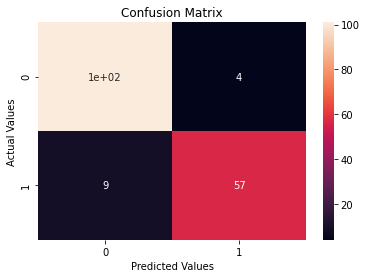

In [81]:
sns.heatmap(con_matrix, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')

In [83]:
accuracy_score(ytest, knn_classifier_pred)

0.9239766081871345

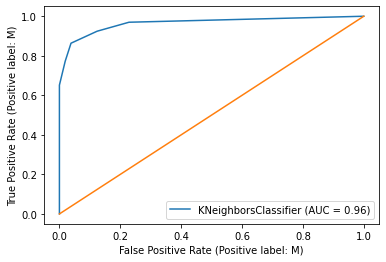

In [88]:
plot_roc_curve(neighbor, xtest, ytest)
plt.plot([0,1],[0,1])

### Applying Decisiopn Tree

In [94]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [95]:
dt_clf = DecisionTreeClassifier()

In [96]:
dt_clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [97]:
dt_clf_pred = dt_clf.predict(xtest)
dt_clf_pred

array(['M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'M',
       'M', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M',
       'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'M'], dtype=object)

In [98]:
dt_clf.predict([[17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189]])

array(['M'], dtype=object)

#### Evaluate Model (Accuracy, Confusion Matrix, ROC, AUC, Classification Report)

In [99]:
print(classification_report(ytest, dt_clf_pred))

              precision    recall  f1-score   support

           B       0.93      0.92      0.93       105
           M       0.88      0.89      0.89        66

    accuracy                           0.91       171
   macro avg       0.91      0.91      0.91       171
weighted avg       0.91      0.91      0.91       171



In [100]:
con_matrix2 = confusion_matrix(ytest, dt_clf_pred)
con_matrix2

array([[97,  8],
       [ 7, 59]])

Text(0.5, 1.0, 'Confusion Matrix')

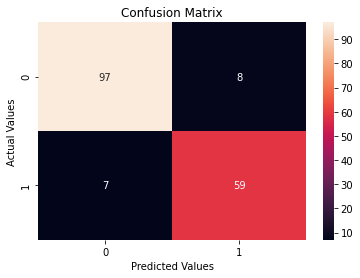

In [101]:
sns.heatmap(con_matrix2, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')

In [102]:
accuracy_score(ytest, dt_clf_pred)

0.9122807017543859

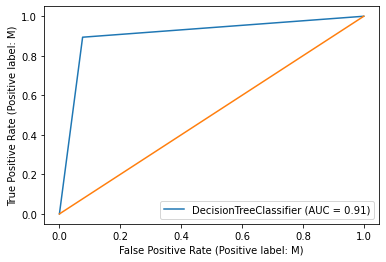

In [103]:
plot_roc_curve(dt_clf, xtest, ytest)
plt.plot([0,1],[0,1])